In [1]:
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
%matplotlib inline
seed = 0
np.random.seed(seed)
import tensorflow as tf
tf.random.set_seed(seed)
import os
os.environ['PATH'] = '/opt/Xilinx/Vivado/2019.2/bin:' + os.environ['PATH']

2025-05-27 17:02:39.110393: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-27 17:02:39.212237: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-27 17:02:39.506988: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-27 17:02:39.507131: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-27 17:02:39.561333: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
data = fetch_openml('hls4ml_lhc_jets_hlf')
X, y = data['data'], data['target']

/home/donovan/miniconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print(data['feature_names'])
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

['zlogz', 'c1_b0_mmdt', 'c1_b1_mmdt', 'c1_b2_mmdt', 'c2_b1_mmdt', 'c2_b2_mmdt', 'd2_b1_mmdt', 'd2_b2_mmdt', 'd2_a1_b1_mmdt', 'd2_a1_b2_mmdt', 'm2_b1_mmdt', 'm2_b2_mmdt', 'n2_b1_mmdt', 'n2_b2_mmdt', 'mass_mmdt', 'multiplicity']
(830000, 16) (830000,)
      zlogz  c1_b0_mmdt  c1_b1_mmdt  c1_b2_mmdt  c2_b1_mmdt  c2_b2_mmdt  \
0 -2.935125    0.383155    0.005126    0.000084    0.009070    0.000179   
1 -1.927335    0.270699    0.001585    0.000011    0.003232    0.000029   
2 -3.112147    0.458171    0.097914    0.028588    0.124278    0.038487   
3 -2.666515    0.437068    0.049122    0.007978    0.047477    0.004802   
4 -2.484843    0.428981    0.041786    0.006110    0.023066    0.001123   

   d2_b1_mmdt  d2_b2_mmdt  d2_a1_b1_mmdt  d2_a1_b2_mmdt  m2_b1_mmdt  \
0    1.769445    2.123898       1.769445       0.308185    0.135687   
1    2.038834    2.563099       2.038834       0.211886    0.063729   
2    1.269254    1.346238       1.269254       0.246488    0.115636   
3    0.966505  

In [4]:
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y, 5)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y[:5])

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]


In [5]:
scaler = StandardScaler()
X_train_val = scaler.fit_transform(X_train_val)
X_test = scaler.transform(X_test)

In [6]:
np.save('X_train_val.npy', X_train_val)
np.save('X_test.npy', X_test)
np.save('y_train_val.npy', y_train_val)
np.save('y_test.npy', y_test)
np.save('classes.npy', le.classes_)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
from tensorflow.keras.models import load_model
# from callbacks import all_callbacks

2025-05-27 17:03:05.627833: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:f3:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-27 17:03:05.628409: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


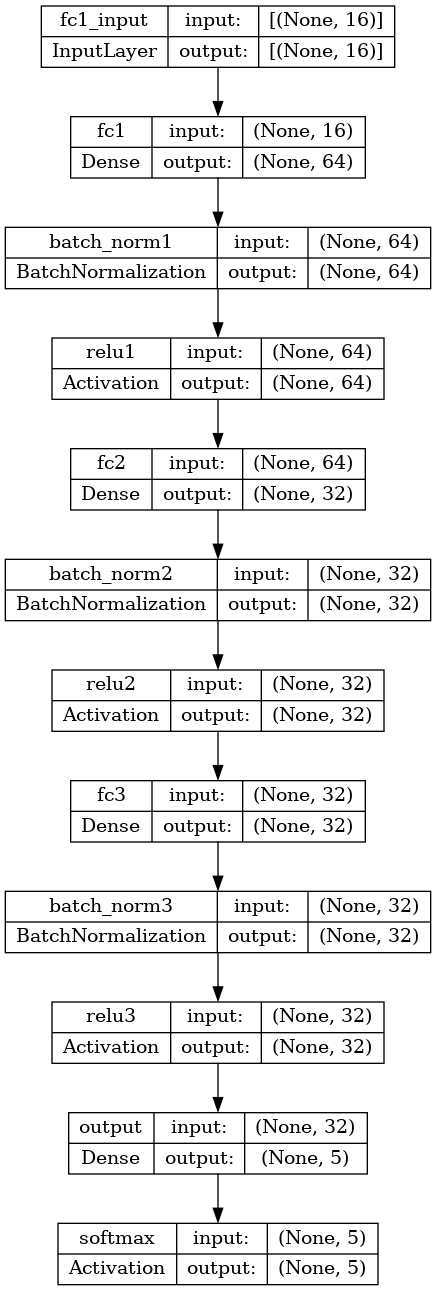

In [8]:
# from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
model = load_model('model.h5', compile=False)
plot_model(model, show_shapes=True, show_layer_names=True)

## Checking intermediary values

In [10]:
TOTAL_BITS = 16
FRACTIONAL_BITS = 10

# Generate random test inputs
num_cases = 7  # Number of test cases
# set seed for reproducibility
np.random.seed(0)

# Get x_train_val and y_train_val
X_train_val = np.load('X_train_val.npy')
y_train_val = np.load('y_train_val.npy')

# randomly sample num_cases data points
test_indices = np.random.choice(X_train_val.shape[0], num_cases, replace=False)
test_inputs = X_train_val[test_indices]
test_outputs = y_train_val[test_indices]
# test_inputs = [np.random.uniform(-10, 10, (16,)) for _ in range(num_cases)]

In [11]:
import hls4ml
config = hls4ml.utils.config_from_keras_model(model, granularity='model')
# config['Model']['Precision'] = 'ap_fixed<22,11>'
config['Model']['Precision'] = f'ap_fixed<{TOTAL_BITS},{FRACTIONAL_BITS}>'
print("-----------------------------------")
hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                       hls_config=config,
                                                    #    output_dir='model_4/hls4ml_prj',
                                                       output_dir=f'model_5/{TOTAL_BITS}_{FRACTIONAL_BITS}_prj',
                                                      #  part='xcu280-fsvh2892-2L-e')
                                                      part='xcu250-figd2104-2L-e')
hls_model.build(csim=False, synth=True, vsynth=True, export=True)
hls_model.compile()

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: fc1, layer type: Dense, input shapes: [[None, 16]], output shape: [None, 64]
Layer name: batch_norm1, layer type: BatchNormalization, input shapes: [[None, 64]], output shape: [None, 64]
Layer name: relu1, layer type: Activation, input shapes: [[None, 64]], output shape: [None, 64]
Layer name: fc2, layer type: Dense, input shapes: [[None, 64]], output shape: [None, 32]
Layer name: batch_norm2, layer type: BatchNormalization, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: relu2, layer type: Activation, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: fc3, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: batch_norm3, layer type: BatchNormalization, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: relu3, layer type: Activation, input shapes: [[None, 32]], output

/home/donovan/miniconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Done


In [12]:
hls4ml.report.read_vivado_report(f'model_5/{TOTAL_BITS}_{FRACTIONAL_BITS}_prj')

Found 1 solution(s) in model_5/16_10_prj/myproject_prj.
Reports for solution "solution1":

C simulation report not found.
SYNTHESIS REPORT:
== Vivado HLS Report for 'myproject'
* Date:           Tue May 27 17:15:51 2025

* Version:        2019.1 (Build 2552052 on Fri May 24 15:28:33 MDT 2019)
* Project:        myproject_prj
* Solution:       solution1
* Product family: virtexuplus
* Target device:  xcu250-figd2104-2L-e


== Performance Estimates
+ Timing (ns): 
    * Summary: 
    +--------+-------+----------+------------+
    |  Clock | Target| Estimated| Uncertainty|
    +--------+-------+----------+------------+
    |ap_clk  |   5.00|     3.971|        0.62|
    +--------+-------+----------+------------+

+ Latency (clock cycles): 
    * Summary: 
    +-----+-----+-----+-----+----------+
    |  Latency  |  Interval | Pipeline |
    | min | max | min | max |   Type   |
    +-----+-----+-----+-----+----------+
    |   13|   13|    1|    1| function |
    +-----+-----+-----+-----+-----

In [11]:
from pprint import pprint
pprint(config)

{'Model': {'BramFactor': 1000000000,
           'Precision': 'ap_fixed<16,10>',
           'ReuseFactor': 1,
           'Strategy': 'Latency',
           'TraceOutput': False}}


In [13]:
debug = False

# Define constants for fixed-point arithmetic

SCALE = 2**FRACTIONAL_BITS  # Scaling factor for fractional bits
RANGE_MIN = -2**(TOTAL_BITS - FRACTIONAL_BITS - 1)  # Minimum representable value
RANGE_MAX = 2**(TOTAL_BITS - FRACTIONAL_BITS - 1) - 1 / SCALE  # Maximum representable value

np.set_printoptions(precision=8, suppress=True)

# Function to quantize a value to fixed-point resolution
def quantize_to_fixed_point(values, scale, range_min, range_max):
    quantized = np.round(values * scale) / scale  # Quantize to fractional steps
    return np.clip(quantized, range_min, range_max)  # Clip to representable range


# Define a TensorFlow model (replace this with your actual model

# Ensure that the model has been compiled and built
if not model.built:
    model.build(input_shape=(None, model.input_shape[1]))

# Get the output of the layer before softmax (assumed to be the Dense layer called 'output')
# output_layer_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)

# More test cases
more_test_inputs = [
    np.ones((model.input_shape[1],)),  # All ones input
    np.zeros((model.input_shape[1],)),  # All zeros input
    # Add more test inputs here as needed
]

# Quantize the test inputs
quantized_inputs = [quantize_to_fixed_point(inp, SCALE, RANGE_MIN, RANGE_MAX) for inp in test_inputs]


layer_outputs = [layer.output for layer in model.layers]
intermediate_models = [
    tf.keras.Model(inputs=model.input, outputs=model.layers[i].output)
    for i in range(len(model.layers))
]

if debug:
    print("=" * 50)
    print(model.summary())
    print("=" * 50)


    for intermediate_model in intermediate_models:
        print(intermediate_model.summary())

# Run the test inputs through the model
results = []
for i, (original, quantized) in enumerate(zip(test_inputs, quantized_inputs)):
    original_reshaped = original.reshape((1, 16))  # Reshape to (1, 16)
    
    if debug:
        print(original_reshaped.shape)
    
    original_outputs = [intermediate_model(original_reshaped).numpy() for intermediate_model in intermediate_models]
    quantized_outputs = [intermediate_model(np.expand_dims(quantized, axis=0)).numpy() for intermediate_model in intermediate_models]
    hls_output = hls_model.predict(np.expand_dims(original, axis=0))

    results.append({
        "test_case": i + 1,
        "original_input": original,
        "quantized_input": quantized,
        "original_layer_outputs": original_outputs,
        "quantized_layer_outputs": quantized_outputs,
        "hls_output": hls_output
    })

# Print the results
print(f"Nfrac = {FRACTIONAL_BITS}, Nbits = {TOTAL_BITS}")

for result, test_output in zip(results, test_outputs):
    original_input = result["original_input"]
    quantized_input = result["quantized_input"]

    # Generate Verilog representation of quantized input
    verilog_input = ", ".join([
        f"{'-' if value < 0 else ''}{TOTAL_BITS}'d{int(abs(value) * SCALE)}"
        for value in quantized_input
    ])
    verilog_line = f"input_data = '{{ {verilog_input} }};"

    # Print test case details
    print(f"Test Case {result['test_case']}:")
    print("Original Input:", original_input)
    print("Quantized Input:", quantized_input)

    # Print outputs for each layer
    print("\nLayer Outputs:")
    for layer_index, (original_output, quantized_output) in enumerate(zip(result["original_layer_outputs"], result["quantized_layer_outputs"])):
        layer_name = model.layers[layer_index].name
        print(f"Layer {layer_index + 1} ({layer_name}):")
        print("  Original Output:", original_output)
        print("  Quantized Output:", quantized_output)
        
    print("\nHLS Output:")
    print(result["hls_output"])
    
    # Print expected output
    print("\nExpected Output:")
    print(test_output)

    # Print Verilog representation
    print("\nVerilog Input:")
    print(verilog_line)
    print("-" * 50)

Nfrac = 10, Nbits = 16
Test Case 1:
Original Input: [-0.5828335   0.49684883 -0.01840194 -0.24045882  0.45094865 -0.07771909
  0.86848911  0.10791043  0.86848911  0.14491933 -0.00588726 -0.34130106
  0.5305878  -0.01985769  0.02133072  0.32723323]
Quantized Input: [-0.58300781  0.49707031 -0.01855469 -0.24023438  0.45117188 -0.078125
  0.86816406  0.10839844  0.86816406  0.14453125 -0.00585938 -0.34082031
  0.53027344 -0.01953125  0.02148438  0.32714844]

Layer Outputs:
Layer 1 (fc1):
  Original Output: [[-0.16040038  0.23987657 -0.37658423 -0.35861397 -0.00746266  0.33400446
   0.01265186 -0.20090431 -0.23094484  0.07019582 -0.13049212  0.20883499
   0.14462219 -0.25555778  0.47251913  0.39192244 -0.07916892 -0.03040214
   0.04339003  0.17110287  0.41694134  0.11701028  0.2439712   0.11100718
   0.13241413  0.210205   -0.08614396  0.0412487  -0.12223095  0.21280019
   0.24709864  0.1697331  -0.02018069  0.18233861  0.13818273  0.3535379
   0.21207228  0.04519686  0.07837883 -0.4187987

## HLS4ML stuff

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: fc1, layer type: Dense, input shapes: [[None, 16]], output shape: [None, 64]
Layer name: batch_norm1, layer type: BatchNormalization, input shapes: [[None, 64]], output shape: [None, 64]
Layer name: relu1, layer type: Activation, input shapes: [[None, 64]], output shape: [None, 64]
Layer name: fc2, layer type: Dense, input shapes: [[None, 64]], output shape: [None, 32]
Layer name: batch_norm2, layer type: BatchNormalization, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: relu2, layer type: Activation, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: fc3, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: batch_norm3, layer type: BatchNormalization, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: relu3, layer type: Activation, input shapes: [[None, 32]], output

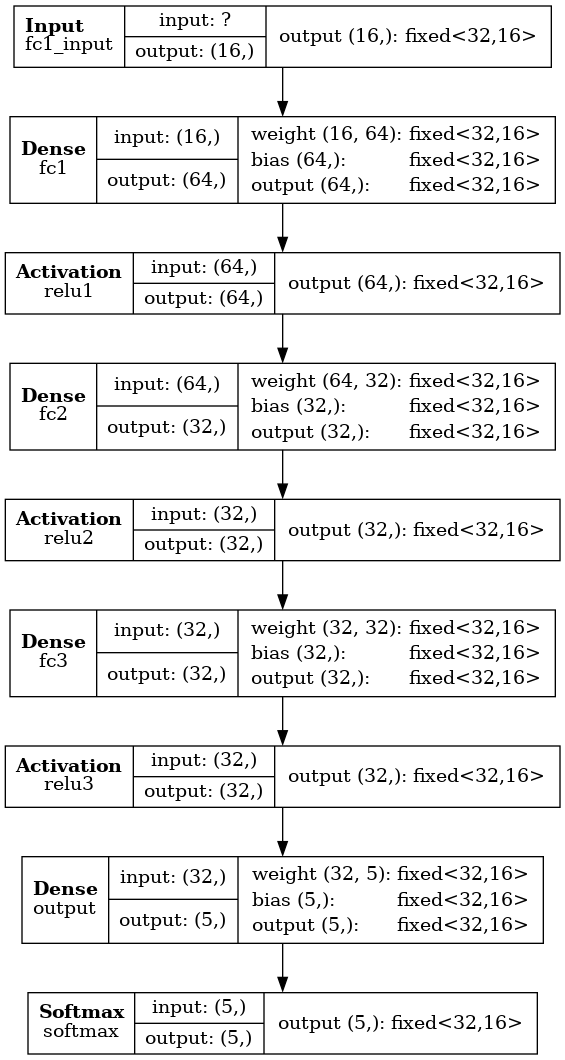

In [9]:
import hls4ml
config = hls4ml.utils.config_from_keras_model(model, granularity='model')
# config['Model']['Precision'] = 'ap_fixed<22,11>'
config['Model']['Precision'] = 'ap_fixed<32,16>'
print("-----------------------------------")
hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                       hls_config=config,
                                                    #    output_dir='model_4/hls4ml_prj',
                                                       output_dir='model_5/32_16_prj',
                                                       part='xcu280-fsvh2892-2L-e')
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)

In [10]:
hls_model.compile()

Writing HLS project


/home/donovan/miniconda3/envs/hls4ml-tutorial/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Done


### (Donovan) Get HLS4ML outputs

In [27]:
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)
hls_y_pred = hls_model.predict(np.ascontiguousarray(X_test))
print("hls_y_pred.shape", hls_y_pred.shape)
print(type(hls_y_pred))

X_test.shape (166000, 16)
y_test.shape (166000, 5)
hls_y_pred.shape (166000, 5)
<class 'numpy.ndarray'>


In [28]:
output = model.predict(X_test)
print(output.shape)
# print(output)
# print(hls_y_pred[0:5])

5188/5188 [==============================] - 9s 2ms/step
(166000, 5)


In [30]:
# check if the max indicies are the same for the first 20 predictions
indices = np.argmax(output, axis=1)
hls_indices = np.argmax(hls_y_pred, axis=1)

print('indices.shape', indices.shape)
print('hls_indices.shape', hls_indices.shape)

print(indices[0:20])
print(hls_indices[0:20])

indices.shape (166000,)
hls_indices.shape (166000,)
[0 1 2 2 2 2 1 0 1 3 1 4 3 4 2 0 3 4 4 0]
[0 1 2 2 2 2 1 0 1 3 1 4 3 4 2 0 3 4 4 0]


In [31]:
np.save('hls_y_pred.npy', hls_y_pred)
np.save('keras_y_pred.npy', output)
np.save('hls_max_indices.npy', hls_indices)
np.save('keras_max_indices.npy', indices)

### (Donovan) build the hls4ml model

In [ ]:
hls_model.build(csim=False)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2019.1 (64-bit)
  **** SW Build 2552052 on Fri May 24 14:47:09 MDT 2019
  **** IP Build 2548770 on Fri May 24 18:01:18 MDT 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source /tools/Xilinx/Vivado/2019.1/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/tools/Xilinx/Vivado/2019.1/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'donovan' on host 'Donovan-3.' (Linux_x86_64 version 5.15.153.1-microsoft-standard-WSL2) on Tue Feb 25 02:58:33 PST 2025
INFO: [HLS 200-10] On os Ubuntu 22.04.4 LTS
INFO: [HLS 200-10] In directory '/home/donovan/code/research/hls4ml/waiz-khan-files/model_5/32_16_prj'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Creating and opening project '/home/donovan/code/research/hls4ml/waiz-khan-files/model_5/32_16_prj/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] Adding test ben